In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("results/PTSD_cognet_test.joblib")

In [4]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

ptsd1 ptsd2 ptsd3 ptsd4 ptsd5 ptsd6 ptsd7 ptsd8 ptsd9 ptsd10  ... ptsd202  \
0       4     2     5     4     2     3     2     3     3      2  ...       2   
1       3     2     3     3     1     3     2     2     2      1  ...       3   
2       2     2     2     4     1     3     3     2     2      4  ...       4   
3       2     2     5     1     3     2     1     2     2      1  ...       1   
4       4     1     1     1     2     2     1     1     1      2  ...       2   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...     ...   
299     4     2     3     4     1     1     1     1     3      2  ...       2   
300     5     2     2     4     4     3     2     5     4      4  ...       5   
301     5     1     2     1     1     3     5     5     3      4  ...       4   
302     2     1     3     3     1     2     2     2     1      1  ...       1   
303     5     2     1     1     1     1     1     1     1      1  ...       2   

    ptsd203 ptsd204 ptsd205 ptsd206 ptsd207 ptsd208 ptsd209 ptsd210 ptsd211  
0         4       4       3       2       3       2       2       4       2  
1         4       4       3       3       3       4       3       4       5  
2         2       2       4       4       2       3       2       2       5  
3         2       3       3       3       2       1       1       2       2  
4         2       2       2       1       1       2       2       2       3  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
299       2       2       2       2       2       2       2       2       3  
300       5       5       5       4       5       5       4       4       5  
301       3       3       2       3       1       3       2       5       5  
302       1       1       1       1       2       2       2       2       2  
303       2       1       2       1       1       2       2       1       4  

[304 rows x 211 columns]

In [8]:
cognet_obj.dmat_filewriter("results/PTSD_cognet_test.joblib",
                           #mpi_path="mpi_tmp",
                           pyfile="PTSD_cognet.py",
                           NODES=4,T=2)

In [5]:
# random mask and reconstruction
cognet_obj.set_nsamples(10)
recon_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv')
print("reconstruction results", recon_df)

reconstruction results       rederr    r_prob  rand_err  \
0  48.917114  0.219196  0.375036   
1  40.028876  0.219811  0.404436   
2  35.424402  0.217890  0.398743   
3  38.470918  0.215278  0.435246   
4  30.306426  0.220370  0.435303   
5  38.005403  0.218636  0.397338   
6  32.566775  0.217308  0.477530   
7  36.837556  0.219266  0.446462   
8  30.448983  0.221500  0.402916   
9  37.911941  0.218056  0.380997   

                                               mask_  
0  [ptsd1, ptsd2, ptsd3, ptsd6, ptsd8, ptsd9, pts...  
1  [ptsd1, ptsd3, ptsd6, ptsd7, ptsd8, ptsd9, pts...  
2  [ptsd2, ptsd5, ptsd7, ptsd9, ptsd10, ptsd13, p...  
3  [ptsd3, ptsd5, ptsd6, ptsd7, ptsd8, ptsd12, pt...  
4  [ptsd1, ptsd3, ptsd4, ptsd10, ptsd11, ptsd14, ...  
5  [ptsd2, ptsd4, ptsd5, ptsd6, ptsd10, ptsd12, p...  
6  [ptsd6, ptsd7, ptsd10, ptsd12, ptsd13, ptsd14,...  
7  [ptsd1, ptsd3, ptsd5, ptsd6, ptsd7, ptsd9, pts...  
8  [ptsd1, ptsd2, ptsd3, ptsd6, ptsd7, ptsd9, pts...  
9  [ptsd1, ptsd3, ptsd5, ptsd7

In [12]:
cognet_dist = qdistance(np.array(cognet_obj.samples.iloc[3]), np.array(cognet_obj.samples.iloc[4]), model_obj.myQnet, model_obj.myQnet)
qdistance(samples[3],samples[4], model_obj.myQnet, model_obj.myQnet)
#samples.shape
#len(model_obj.myQnet.feature_names)

0.09268731566380246

In [9]:
print(samples[3])
print(np.array(data_obj.samples.iloc[3]))

['2' '2' '5' '1' '3' '2' '1' '2' '2' '1' '2' '3' '3' '3' '3' '1' '3' '2'
 '2' '1' '1' '1' '1' '3' '3' '2' '3' '4' '3' '3' '1' '2' '4' '3' '3' '3'
 '3' '1' '3' '2' '3' '4' '2' '3' '3' '1' '1' '3' '3' '3' '1' '3' '4' '1'
 '1' '2' '2' '1' '1' '4' '3' '1' '1' '1' '2' '1' '1' '2' '2' '1' '1' '2'
 '2' '2' '2' '2' '2' '1' '2' '2' '1' '3' '1' '3' '3' '2' '2' '1' '2' '2'
 '1' '1' '3' '3' '2' '1' '1' '4' '1' '2' '1' '1' '4' '2' '2' '1' '1' '4'
 '3' '2' '1' '1' '3' '4' '2' '2' '1' '1' '1' '2' '2' '1' '3' '3' '2' '2'
 '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2'
 '1' '1' '2' '3' '2' '1' '1' '1' '2' '2' '2' '1' '1' '2' '1' '1' '1' '1'
 '1' '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '2' '1' '1' '1' '2' '3' '3' '3' '2' '1' '1' '2' '2']
[2 2 5 1 3 2 1 2 2 1 2 3 3 3 3 1 3 2 2 1 1 1 1 3 3 2 3 4 3 3 1 2 4 3 3 3 3
 1 3 2 3 4 2 3 3 1 1 3 3 3 1 3 4 1 1 2 2 1 1 4 3 1 1 1 2 1 1 2 2 1 1

In [ ]:
data_obj.samples.iloc[2]

In [ ]:
# compute dissonance matrix
return_dict = cognet_obj.dissonance_matrix(output_file="mpi_tmp/PTSD_dissonance_matrix.csv", n_jobs=4)
return_dict

In [ ]:
# embed distance matrix, make sure to generate distance matrix first
cognet_obj.embed("mpi_tmp/distmatrix.csv", "PTSD", "mpi_tmp/",EMBED_BINARY='cognet/cognet/bin/__embed__.so')

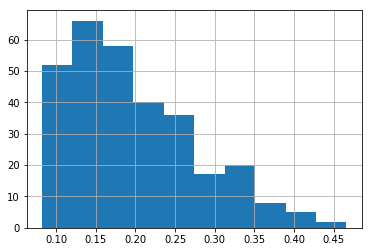

In [19]:
D=pd.DataFrame(return_dict.copy())
D.mean().hist()

In [ ]:
# samples = pd.read_csv("PTSD_cognet_test.csv")
# samples = samples.drop(['record_id', 'PTSDDx'], axis=1)
# samples.to_csv("PTSD_cognet_test_processed.csv", index=False)
# samples = pd.read_csv("PTSD_cognet_test_processed.csv")
# samples